# Newton's Method

To find the roots of a function $f(x)$, which has deriviative $f(x)'$, we start with an initial guess, $x_0$.  We update our guess by
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

## One Variable

A linear function is in some sense trivial, since we can solve for the root exactly.  But using Newton's Method would look like this.

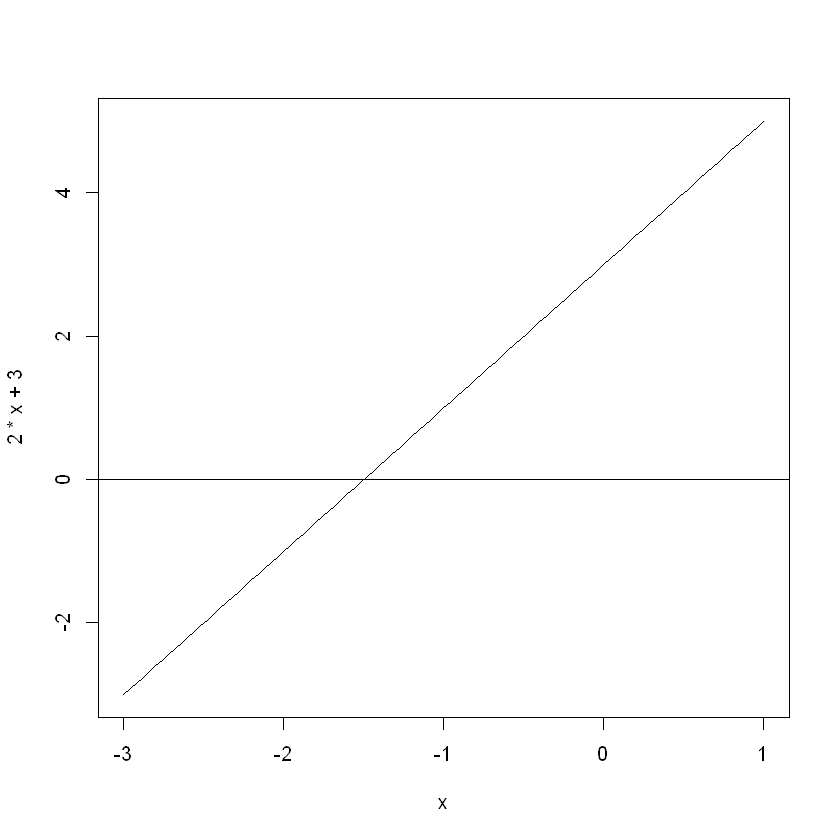

In [17]:
curve(2*x+3, -3,1)
abline(0,0)

In [1]:
F <- function (x) {2*x+3} # just an arbitrary linear function
f <- function (x) {2} # the derivative function of F
x0 <- 0               # the initial guess doesn't matter, in this case
x <- x0 - F(x0)/f(x0)  # Newton's Method
x

[1] -1.5

A polynomial is a little more interesting.

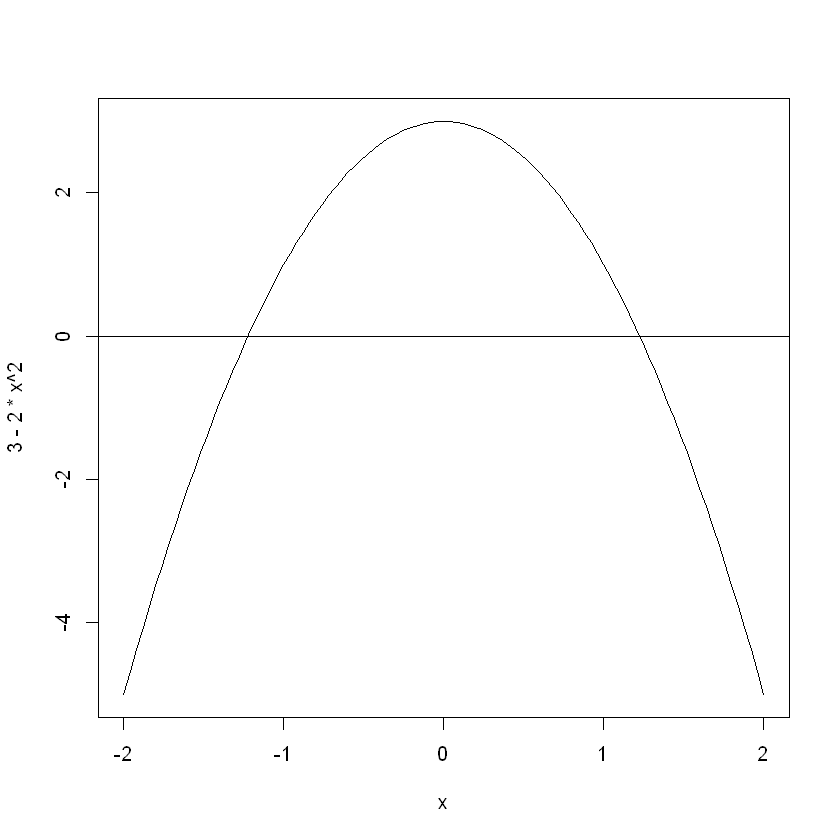

In [16]:
curve(3-2*x^2, -2,2)
abline(0,0)

In [5]:
F <- function (x) {3 - 2*x^2} # an quadratic function with two roots
f <- function (x) {-4*x} # the derivative function of F
x0 <- 2.5 # note we cannot start at x==0
while (abs(F(x0))> 1e-8) {
    x <- x0 - F(x0)/f(x0)  # Newton's Method
    x0 <- x
    print(x)
}
x

[1] 1.55
[1] 1.258871
[1] 1.225207
[1] 1.224745


[1] 1.224745

Here, which root we find depends on where we start.

In [7]:
x0 <- -0.1 # note we cannot start at x==0
while (abs(F(x0))> 1e-8) {
    x <- x0 - F(x0)/f(x0)  # Newton's Method
    x0 <- x
    print(x)
}
x

[1] -7.55
[1] -3.874338
[1] -2.13075
[1] -1.417364
[1] -1.237833
[1] -1.224814
[1] -1.224745


[1] -1.224745

One more example.

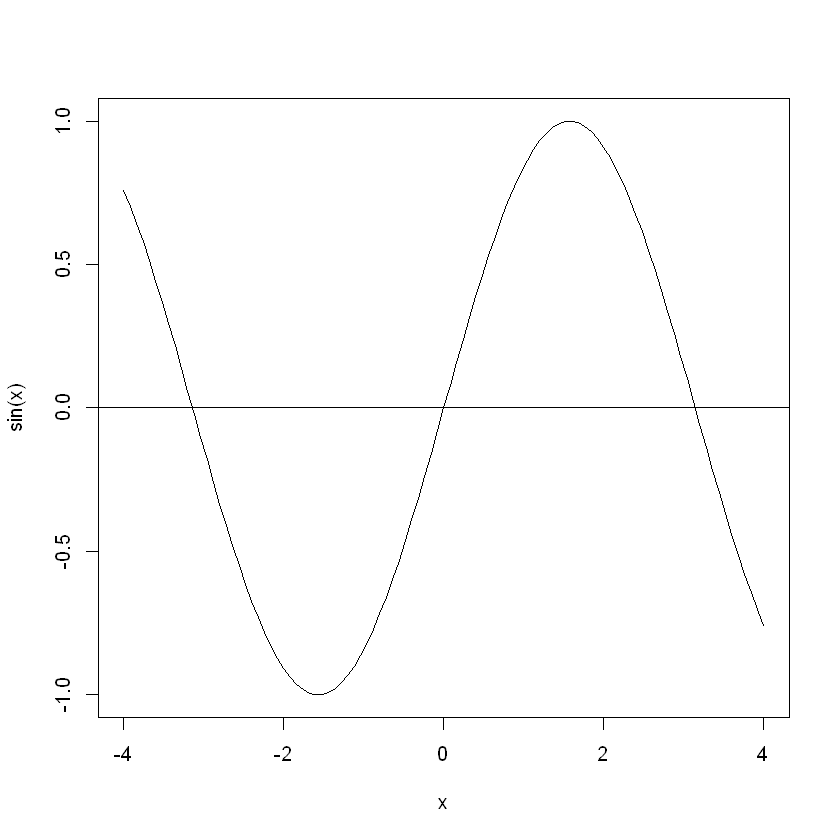

In [15]:
curve(sin(x), -4,4)
abline(0,0)

In [13]:
F <- function (x) {sin(x)}
f <- function (x) {cos(x)}
x0 <- -0.1 # note we cannot start at x==pi/2
while (abs(F(x0))> 1e-5) {
    x <- x0 - F(x0)/f(x0)  # Newton's Method
    x0 <- x
    print(x)
}
x

[1] 0.0003346721
[1] -1.249503e-11


[1] -1.249503e-11

In [14]:
x0 <- 2 # note we cannot start at x==pi/2
while (abs(F(x0))> 1e-5) {
    x <- x0 - F(x0)/f(x0)  # Newton's Method
    x0 <- x
    print(x)
}
x

[1] 4.18504
[1] 2.467894
[1] 3.266186
[1] 3.140944
[1] 3.141593


[1] 3.141593

## Vector-valued Functions

But consider a function that transforms two variables
$$F(x_1,x_2)=\left [ \begin{array} & x_1x_2 \\
 x_1 + x_2 \end{array} \right ]$$
which has the solution at $(0,0)$.

Here, the  Jacobian is
$$\left [ \begin{array}
& x_2 & x_1 \\
1 & 1
\end{array} \right ]$$

In [18]:
Fx <- function (x) {
  c(x[1]*x[2],
    x[1]+x[2])
  }
J <- function (x) {
  x1 <- c(x[2],1)
  x2 <- c(x[1],1)
  cbind(x1,x2)
}

x0 <- c(2,1) 
while (norm(as.matrix(Fx(x0)), "F") > 1e-8) {
  x <- solve(J(x0),-Fx(x0))+x0 # Newton's Method
  x0 <- x
}
x


x1            x2 
-6.103516e-05  6.103516e-05

Another example.
Let
$$F(x_1,x_2,x_3) = \left [
\begin{array}
& x_1^2+x_2^2+x_3^2-3 \\
x_1^2+x_2^2-x_3-1 \\
x_1+x_2+x_3-3
\end{array}
\right ]$$

Then the Jacobian is
$$J(x_1,x_2,x_3)= \left [
\begin{array}
& 2x_1 & 2x_2 & 2x_3 \\
2x_1 & 2x_2 & -1 \\
1 & 1+x_3-3
\end{array}
\right ]$$